In [1]:
from interval_predictor import CO2Predictor, IntervalGenerator
from utils import code_names
co2_predictor = CO2Predictor()
co2_forecast = co2_predictor.predict_co2()

interval_generator = IntervalGenerator(code_names)

2023-07-06 10:09:10.059214: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-06 10:09:10.119591: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 10:09:11.009714: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
co2_forecast.shape

(13, 24)

In [3]:
intervals = interval_generator.generate_intervals(forecasts=co2_forecast, max_emission_value=130, co2_delta_to_move=0)

In [4]:
intervals

[('CA-ON',
  [(datetime.datetime(2023, 7, 6, 7, 0, tzinfo=datetime.timezone.utc),
    datetime.datetime(2023, 7, 6, 14, 0, tzinfo=datetime.timezone.utc))]),
 ('FR',
  [(datetime.datetime(2023, 7, 6, 14, 0, tzinfo=datetime.timezone.utc),
    datetime.datetime(2023, 7, 7, 6, 0, tzinfo=datetime.timezone.utc))])]

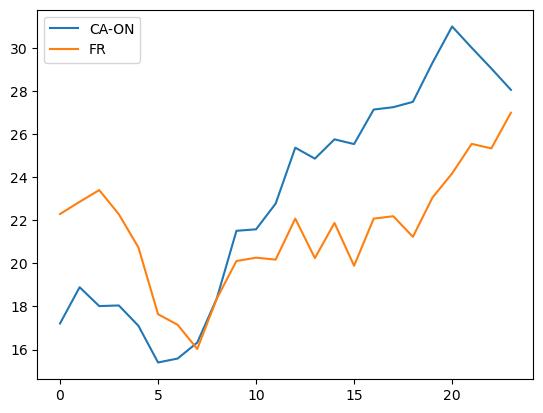

In [5]:
import matplotlib.pyplot as plt

for f, z in zip(co2_forecast, code_names):
    if z in ['CA-ON', 'FR']:
        plt.plot(f, label=z)

plt.legend()